<a href="https://colab.research.google.com/github/DEV-SPD/Airline-Passenger-Satisfaction-Level-Prediction/blob/main/AIRLINE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# AIRLINE PASSENGER SATISFIED/DISSATISFIED PREDICTION MODEL

**DATA PREPARATION**

---



In [6]:
# Importing Necessary Libraries
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 

In [7]:
# Creating DataFrame
df = pd.read_csv('airline.csv')

In [8]:
df.shape

(103904, 25)

In [9]:
# Getting top 5 rows of dataframe
df.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [10]:
# Checking for null values
df.isnull().sum()

Unnamed: 0                             0
id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction    

There are total 310 null values in arrival delay column. So we can handle those missing values by replacing them by mean value of entire column

In [11]:
# Determining mean arrival delay in minutes
mean_delay = df['Arrival Delay in Minutes'].mean()

In [12]:
df['Arrival Delay in Minutes'] = df['Arrival Delay in Minutes'].fillna(mean_delay)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location                      1039

Now DataFrame is free from null values.

In [14]:
# Renaming the column so that there is no white space in between
df1 = df.rename({'Customer Type':'Customer_Type', 'Type of Travel':'Type_of_Travel','Flight Distance':'Flight_Distance','Inflight wifi service':'Inflight_wifi_service','Departure/Arrival time convenient':'Departure/Arrival_time_convenient','Ease of Online booking':'Ease_of_Online_booking','Gate location ':'Gate_location','Food and drink':'Food_and_drink','Online boarding':'Online_boarding','Seat comfort':'Seat_comfort','Inflight entertainment':'Inflight_entertainment','On-board service':'On-board_service','Leg room service':'Leg_room_service','Baggage handling':'Baggage_handling','Checkin service':'Checkin_service', 'Inflight service':'Inflight_service', 'Departure Delay in Minutes':'Departure_Delay_in_Minutes','Arrival Delay in Minutes':'Arrival_Delay_in_Minutes'},axis=1)

In [15]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [16]:
col1 = LabelEncoder()
col2 = LabelEncoder()
col3 = LabelEncoder()
col4 = LabelEncoder()
col5 = LabelEncoder()

In [17]:
df1['gender'] = col1.fit_transform(df1['Gender'])
df1['customer_type'] = col2.fit_transform(df1['Customer_Type'])
df1['type_of_travel'] = col3.fit_transform(df1['Type_of_Travel'])
df1['class'] = col4.fit_transform(df1['Class'])
df1['Satisfaction'] = col5.fit_transform(df1['satisfaction'])

In [18]:
x= df1.drop(columns = ['id','Gender','Customer_Type','Type_of_Travel','Class','satisfaction','Satisfaction'])
y= df1.Satisfaction

In [19]:
scaler = StandardScaler()
scaler.fit_transform(x)

array([[-1.73203414, -1.7452793 , -0.73153876, ..., -0.4727667 ,
         1.49061375,  2.26461832],
       [-1.7320008 , -0.95136024, -0.95718354, ...,  2.11520819,
        -0.6708646 , -0.95705413],
       [-1.73196746, -0.88520032, -0.04758435, ..., -0.4727667 ,
        -0.6708646 , -0.95705413],
       ...,
       [ 1.73196746, -0.62056063,  0.8078601 , ...,  2.11520819,
        -0.6708646 , -0.95705413],
       [ 1.7320008 , -1.14984   , -0.18999128, ...,  2.11520819,
        -0.6708646 ,  0.65378209],
       [ 1.73203414, -0.8190404 ,  0.53508063, ..., -0.4727667 ,
        -0.6708646 , -0.95705413]])

**EXPLORATORY DATA ANALYSIS**

---



In [38]:
df1.describe()

,Unnamed: 0,id,Age,Flight_Distance,Inflight_wifi_service,Departure/Arrival_time_convenient,Ease_of_Online_booking,Gate location,Food_and_drink,Online_boarding,Seat_comfort,Inflight_entertainment,On-board_service,Leg_room_service,Baggage_handling,Checkin_service,Inflight_service,Cleanliness,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes
count,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000
mean,51951.500000,64924.210502,39.379706,1189.448375,2.729683,3.060296,2.756901,2.976883,3.202129,3.250375,3.439396,3.358158,3.382363,3.351055,3.631833,3.304290,3.640428,3.286351,14.815618,15.178678
std,29994.645522,37463.812252,15.114964,997.147281,1.327829,1.525075,1.398929,1.277621,1.329533,1.349509,1.319088,1.332991,1.288354,1.315605,1.180903,1.265396,1.175663,1.312273,38.230901,38.640909
min,0.000000,1.000000,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25975.750000,32533.750000,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,51951.500000,64856.500000,40.000000,843.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,77927.250000,97368.250000,51.000000,1743.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,103903.000000,129880.000000,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


In [44]:
df1['satisfaction'].value_counts()

neutral or dissatisfied    58879
satisfied                  45025
Name: satisfaction, dtype: int64

In [40]:
df1['Customer_Type'].value_counts()

Loyal Customer       84923
disloyal Customer    18981
Name: Customer_Type, dtype: int64

In [39]:
df1.groupby('Customer_Type').satisfaction.value_counts()

Customer_Type      satisfaction           
Loyal Customer     neutral or dissatisfied    44390
                   satisfied                  40533
disloyal Customer  neutral or dissatisfied    14489
                   satisfied                   4492
Name: satisfaction, dtype: int64

In [42]:
df1.groupby('Type_of_Travel').satisfaction.value_counts()

Type_of_Travel   satisfaction           
Business travel  satisfied                  41746
                 neutral or dissatisfied    29909
Personal Travel  neutral or dissatisfied    28970
                 satisfied                   3279
Name: satisfaction, dtype: int64

In [41]:
df['Gender'].value_counts()

Female    52727
Male      51177
Name: Gender, dtype: int64

In [43]:
df1.groupby('Gender').satisfaction.value_counts()

Gender  satisfaction           
Female  neutral or dissatisfied    30193
        satisfied                  22534
Male    neutral or dissatisfied    28686
        satisfied                  22491
Name: satisfaction, dtype: int64

In [46]:
df1.groupby('Class').satisfaction.value_counts()

Class     satisfaction           
Business  satisfied                  34480
          neutral or dissatisfied    15185
Eco       neutral or dissatisfied    38044
          satisfied                   8701
Eco Plus  neutral or dissatisfied     5650
          satisfied                   1844
Name: satisfaction, dtype: int64



1.   Out of 58,879 dissatisfied votes nearly 14k false voting comes from 
     disloyal customers.
2.   Out og 45,025 satisfied votes nearly 4k false votes come from 
     disloyal customers.
3.   Which type of travel passenger selects also has an impact on 
     satisfaction level.

4.   satisfactory ratio is poor for females relative to males.



<Axes: xlabel='satisfaction', ylabel='count'>

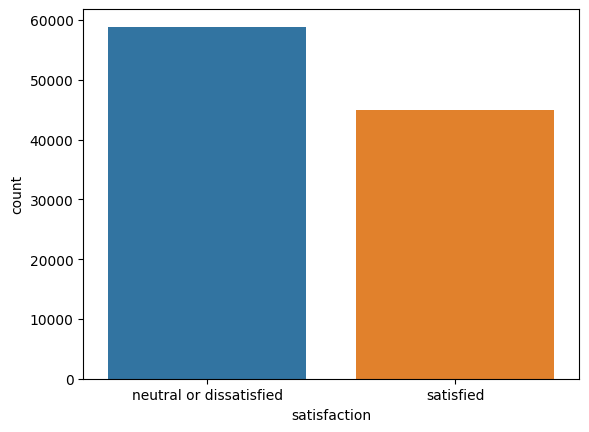

In [52]:
sns.countplot(x='satisfaction', data=df1)

<Axes: xlabel='satisfaction', ylabel='count'>

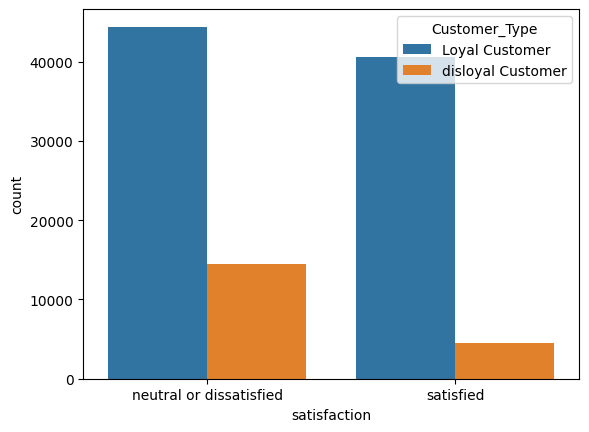

In [53]:
sns.countplot(x='satisfaction',data=df1,hue='Customer_Type')

<Axes: xlabel='satisfaction', ylabel='count'>

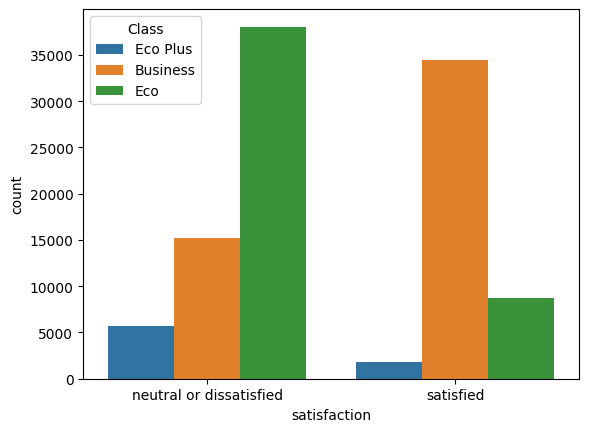

In [54]:
sns.countplot(x='satisfaction',data=df1,hue='Class')

<Axes: xlabel='satisfaction', ylabel='count'>

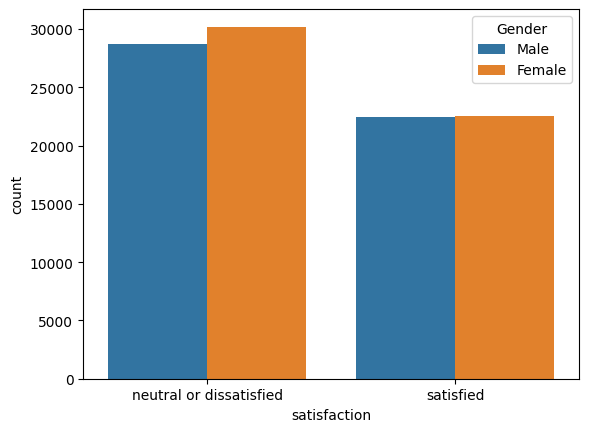

In [55]:
sns.countplot(x='satisfaction',data=df1,hue='Gender')

<Axes: xlabel='satisfaction', ylabel='count'>

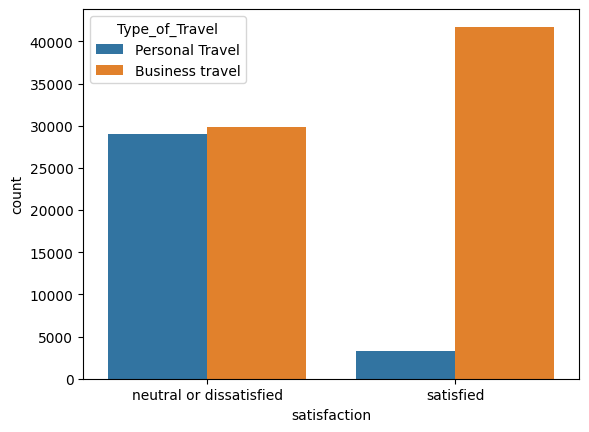

In [56]:
sns.countplot(x='satisfaction',data=df1,hue='Type_of_Travel')

<Axes: xlabel='satisfaction', ylabel='Age'>

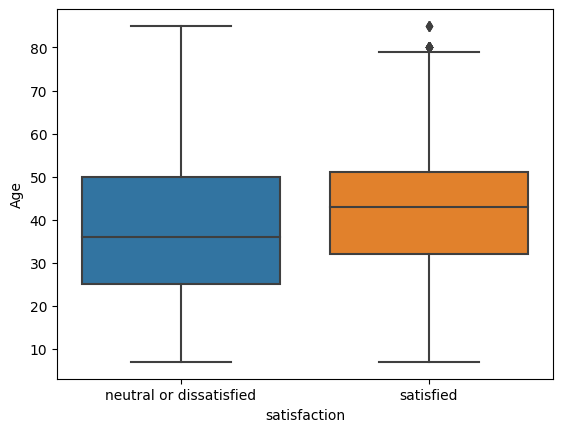

In [57]:
sns.boxplot(x=df.satisfaction, y=df.Age)

**MODEL TRAINING**

---



In [3]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

In [43]:
model = GradientBoostingClassifier(n_estimators = 10000, learning_rate=0.5, max_depth=2)

In [44]:
model.fit(x,y)

GradientBoostingClassifier(learning_rate=0.5, max_depth=2, n_estimators=10000)

**EVALUATING MODEL**

---



In [34]:
import pandas as pd

In [35]:
df2 = pd.read_csv('airline_test.csv')

In [36]:
mean_delay = df2['Arrival Delay in Minutes'].mean()

In [37]:
df2['Arrival Delay in Minutes'] = df2['Arrival Delay in Minutes'].fillna(mean_delay)

In [38]:
df3 = df2.rename({'Customer Type':'Customer_Type', 'Type of Travel':'Type_of_Travel','Flight Distance':'Flight_Distance','Inflight wifi service':'Inflight_wifi_service','Departure/Arrival time convenient':'Departure/Arrival_time_convenient','Ease of Online booking':'Ease_of_Online_booking','Gate location ':'Gate_location','Food and drink':'Food_and_drink','Online boarding':'Online_boarding','Seat comfort':'Seat_comfort','Inflight entertainment':'Inflight_entertainment','On-board service':'On-board_service','Leg room service':'Leg_room_service','Baggage handling':'Baggage_handling','Checkin service':'Checkin_service', 'Inflight service':'Inflight_service', 'Departure Delay in Minutes':'Departure_Delay_in_Minutes','Arrival Delay in Minutes':'Arrival_Delay_in_Minutes'},axis=1)

In [39]:
df3['gender'] = col1.fit_transform(df3['Gender'])
df3['customer_type'] = col2.fit_transform(df3['Customer_Type'])
df3['type_of_travel'] = col3.fit_transform(df3['Type_of_Travel'])
df3['class'] = col4.fit_transform(df3['Class'])
df3['Satisfaction'] = col5.fit_transform(df3['satisfaction'])

In [40]:
x_test= df3.drop(columns = ['id','Gender','Customer_Type','Type_of_Travel','Class','satisfaction','Satisfaction'])
y_test= df3.Satisfaction

In [45]:
model.score(x_test,y_test)

0.9549584231598398